In [1]:

from skimage import io
from skimage.viewer import ImageViewer
import numpy as np
import numpy.linalg as la
from skimage import filters
from skimage import feature
import skimage
import matplotlib.pyplot as plt
import cv2 as cv
from sklearn.cluster import KMeans
from sklearn.preprocessing import MinMaxScaler
from sklearn import preprocessing
from skimage.draw import circle


~/.dontsync/packages/pyenv/versions/sa_env/lib/python3.8/site-packages/skimage/viewer/utils/__init__.py:1: UserWarning: Recommended matplotlib backend is `Agg` for full skimage.viewer functionality.
  from .core import *


TiffPage 0: TiffFileError: invalid tag value offset
OME series: incompatible page shape (264, 264, 4); expected (1960, 2588, 3)


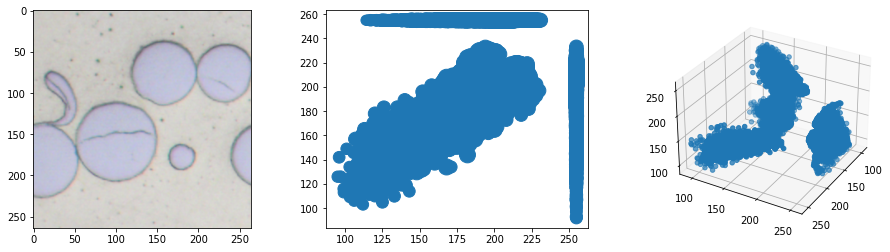

In [2]:
Y = io.imread('~/src/0data/simkom_input_images/201.tif')
image = io.imread('~/src/0data/simkom_input_images/20-1.tif')
# from sklearn.preprocessing import StandardScaler
X=Y.reshape(-1,3)
# X = StandardScaler().fit_transform(X)
fig = plt.figure(figsize=[16,4])
fig.add_subplot(1,3,1)
plt.imshow(Y)
fig.add_subplot(1,3,2)
plt.scatter(X[:,0], X[:,1], X[:,2])
ax = fig.add_subplot(1,3,3, projection='3d')
ax.scatter(X[:,0], X[:,1], X[:,2])
ax.view_init(30, 30)
plt.draw()


In [3]:
Y.shape

(264, 264, 4)

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


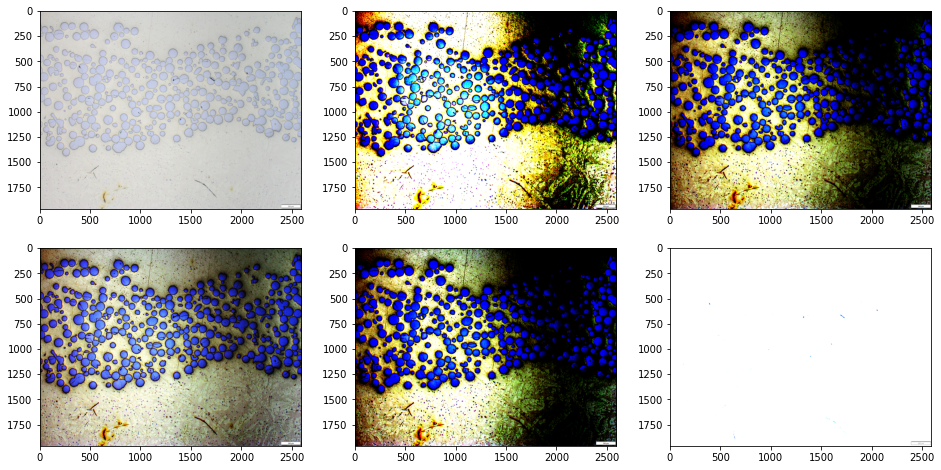

In [4]:
plt.figure(figsize=[16,8])
image_pixels=image.reshape(-1,3)

plt.subplot(2,3,1)
plt.imshow(image)

plt.subplot(2,3,2)
X_scaled1 = image_pixels - np.mean(image_pixels,axis=0)
plt.imshow(X_scaled1.reshape(image.shape))

plt.subplot(2,3,3)
X_scaled2 = preprocessing.StandardScaler().fit_transform(image_pixels)
plt.imshow(X_scaled2.reshape(image.shape))

plt.subplot(2,3,4)
X_scaled3 = preprocessing.QuantileTransformer(random_state=0).fit_transform(image_pixels)
plt.imshow(X_scaled3.reshape(image.shape))

plt.subplot(2,3,5)
X_scaled4 = preprocessing.QuantileTransformer(
    output_distribution='normal', random_state=0).fit_transform(image_pixels)
plt.imshow(X_scaled4.reshape(image.shape))

plt.subplot(2,3,6)
X_scaled5 = preprocessing.PowerTransformer(standardize=True).fit_transform(image_pixels)
X_scaled5 = MinMaxScaler((0,255)).fit_transform(X_scaled5)
plt.imshow(X_scaled5.reshape(image.shape))

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


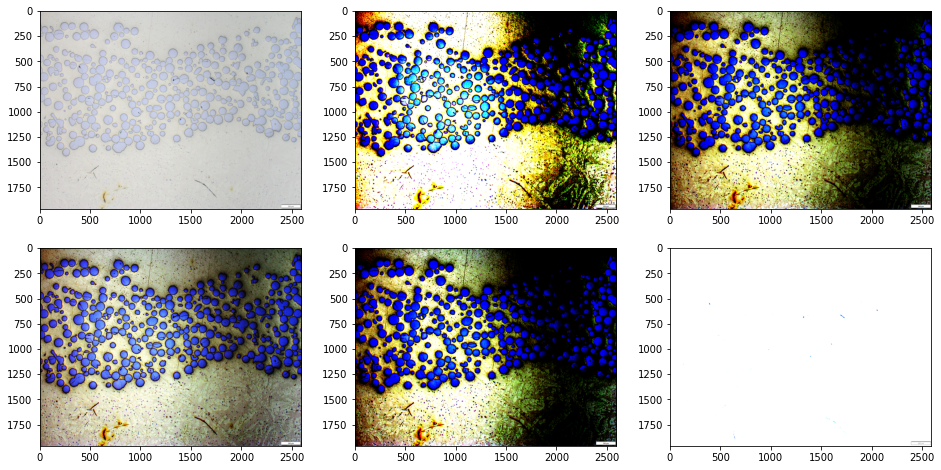

In [5]:
plt.figure(figsize=[16,8])
image_pixels=image.reshape(-1,3)

plt.subplot(2,3,1)
plt.imshow(image)

plt.subplot(2,3,2)
X_scaled1 = image_pixels - np.mean(image_pixels,axis=0)
plt.imshow(X_scaled1.reshape(image.shape))

plt.subplot(2,3,3)
X_scaled2 = preprocessing.StandardScaler().fit_transform(image_pixels)
plt.imshow(X_scaled2.reshape(image.shape))

plt.subplot(2,3,4)
X_scaled3 = preprocessing.QuantileTransformer(random_state=0).fit_transform(image_pixels)
plt.imshow(X_scaled3.reshape(image.shape))

plt.subplot(2,3,5)
X_scaled4 = preprocessing.QuantileTransformer(
    output_distribution='normal', random_state=0).fit_transform(image_pixels)
plt.imshow(X_scaled4.reshape(image.shape))

plt.subplot(2,3,6)
X_scaled5 = preprocessing.PowerTransformer(standardize=True).fit_transform(image_pixels)
X_scaled5 = MinMaxScaler((0,255)).fit_transform(X_scaled5)
plt.imshow(X_scaled5.reshape(image.shape))

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


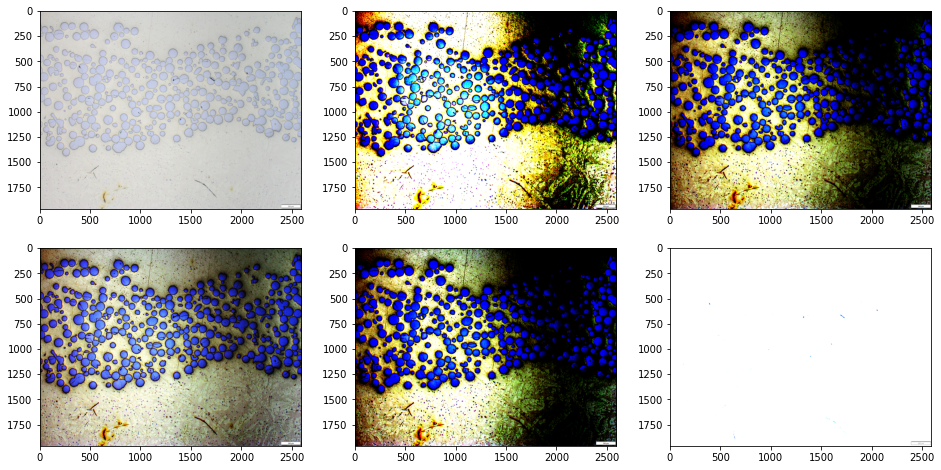

In [6]:
plt.figure(figsize=[16,8])
image_pixels=image.reshape(-1,3)

plt.subplot(2,3,1)
plt.imshow(image)

plt.subplot(2,3,2)
X_scaled1 = image_pixels - np.mean(image_pixels,axis=0)
plt.imshow(X_scaled1.reshape(image.shape))

plt.subplot(2,3,3)
X_scaled2 = preprocessing.StandardScaler().fit_transform(image_pixels)
plt.imshow(X_scaled2.reshape(image.shape))

plt.subplot(2,3,4)
X_scaled3 = preprocessing.QuantileTransformer(random_state=0).fit_transform(image_pixels)
plt.imshow(X_scaled3.reshape(image.shape))

plt.subplot(2,3,5)
X_scaled4 = preprocessing.QuantileTransformer(
    output_distribution='normal', random_state=0).fit_transform(image_pixels)
plt.imshow(X_scaled4.reshape(image.shape))

plt.subplot(2,3,6)
X_scaled5 = preprocessing.PowerTransformer(standardize=True).fit_transform(image_pixels)
X_scaled5 = MinMaxScaler((0,255)).fit_transform(X_scaled5)
plt.imshow(X_scaled5.reshape(image.shape))

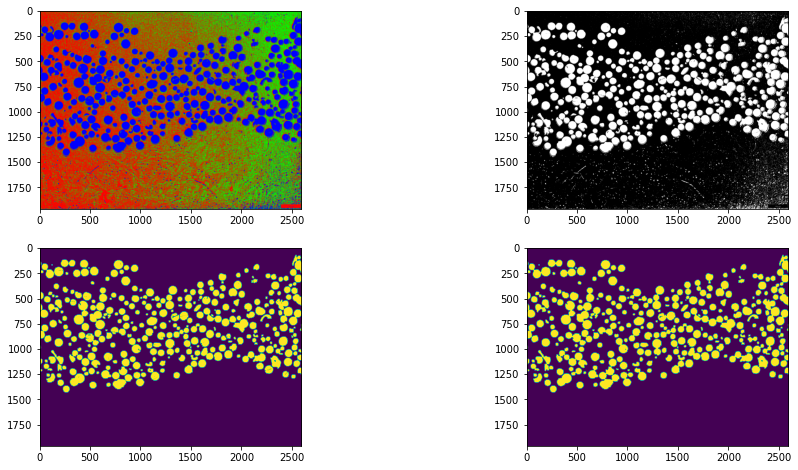

In [7]:
plt.figure(figsize=[16,8])
image_pixels=image.reshape(-1,3)

m_image_pixels = np.zeros_like(image_pixels)
idx = np.argmax(image_pixels,axis=1)
m_image_pixels[idx==0]=[255,0,0]
m_image_pixels[idx==1]=[0,255,0]
m_image_pixels[idx==2]=[0,0,255]
m_image = m_image_pixels.reshape(image.shape)
plt.subplot(2,2,1)
plt.imshow(m_image)

m_image_pixels[idx==2] = [255, 255, 255]
m_image_pixels[idx!=2] = [0, 0, 0]
m_image = m_image_pixels.reshape(image.shape)
plt.subplot(2,2,2)
plt.imshow(m_image)

# https://docs.opencv.org/master/d9/d61/tutorial_py_morphological_ops.html
binary_image = np.mean(m_image, axis=2)
binary_image[binary_image>0]=1
kernel = np.ones((3, 3), np.uint8)
# kernel = cv.getStructuringElement(cv.MORPH_ELLIPSE,(5,5))
image_opening = cv.morphologyEx(binary_image, cv.MORPH_OPEN, kernel, iterations=5)
image_closing = cv.morphologyEx(image_opening, cv.MORPH_CLOSE, kernel, iterations=2)

plt.subplot(2,2,3)
plt.imshow(image_opening)
plt.subplot(2,2,4)
plt.imshow(image_closing)

1118


<ipython-input-8-43defab2fbc4>:19: FutureWarning: `draw.circle` is deprecated in favor of `draw.disk`.`draw.circle` will be removed in version 0.19
  rr, cc = circle(i[1],i[0],i[2])


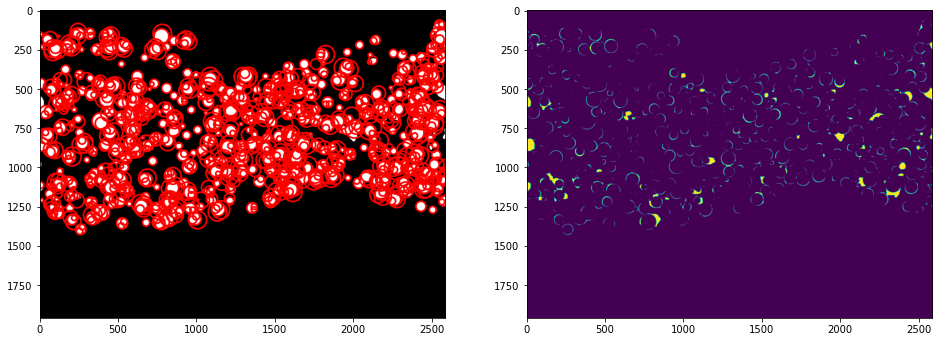

In [8]:
# https://www.pyimagesearch.com/2014/07/21/detecting-circles-images-using-opencv-hough-circles/

plt.figure(figsize=[16,8])
img = np.array(image_closing * 255,dtype=np.uint8)
img = cv.medianBlur(img,5)
cimg = cv.cvtColor(img,cv.COLOR_GRAY2BGR)

circles = cv.HoughCircles(img,cv.HOUGH_GRADIENT,1.7,15,param1=1e-8,param2=20,minRadius=3,maxRadius=60)
circles = np.uint16(np.around(circles))
for i in circles[0,:]:
    cv.circle(cimg,(i[0],i[1]),i[2],(255,0,0),10)

plt.subplot(1,2,1)
plt.imshow(cimg)
print(circles.shape[1])

particles = []
for i in circles[0,:]:
  rr, cc = circle(i[1],i[0],i[2])
  rr[rr>=img.shape[0]] = img.shape[0]-1
  cc[cc>=img.shape[1]] = img.shape[1]-1
  if np.count_nonzero(img[rr, cc]) / np.size(img[rr, cc]) > 0.6:
    img[rr, cc]=0
    particles.append(i)

plt.subplot(1,2,2)
plt.imshow(img)


342


<ipython-input-9-d2b4cb24f98f>:5: FutureWarning: `draw.circle` is deprecated in favor of `draw.disk`.`draw.circle` will be removed in version 0.19
  rr, cc = circle(i[1],i[0],i[2])


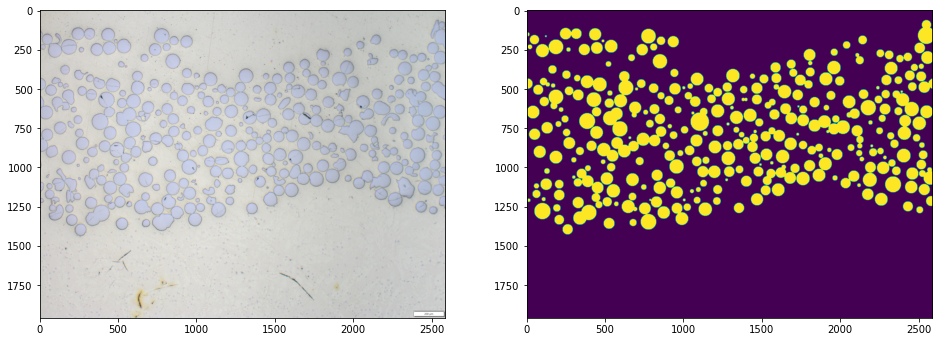

In [9]:
plt.figure(figsize=[16,8])
print(len(particles))
digital_image = 0 * img
for i in particles:
  rr, cc = circle(i[1],i[0],i[2])
  rr[rr>=img.shape[0]] = img.shape[0]-1
  cc[cc>=img.shape[1]] = img.shape[1]-1
  digital_image[rr, cc]=1

plt.subplot(1,2,1)
plt.imshow(image)
plt.subplot(1,2,2)
plt.imshow(digital_image)
# plt.savefig('fig/original_and_segmented.png', bbox_inches='tight')

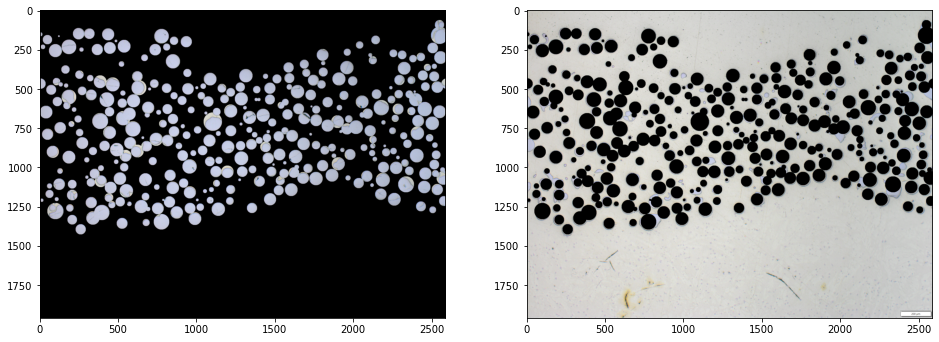

In [10]:
# masked_image = skimage.color.rgb2gray(np.copy(image))
plt.figure(figsize=[16,8])
plt.subplot(1,2,1)
plt.imshow(image * digital_image[...,None])
plt.subplot(1,2,2)
plt.imshow(image * (1-digital_image[...,None]))
# plt.savefig('fig/isolated_phases.png', bbox_inches='tight')

np.save("digital_image",digital_image)
np.save("particles",np.array(particles))

In [11]:
# plt.figure(figsize=[16,8])
# plt.subplot(1,2,1)
# plt.imshow(image)
# plt.subplot(1,2,2)
# plt.imshow(digital_image)


Text(0, 0.5, 'volume fraction')

<Figure size 1152x576 with 0 Axes>

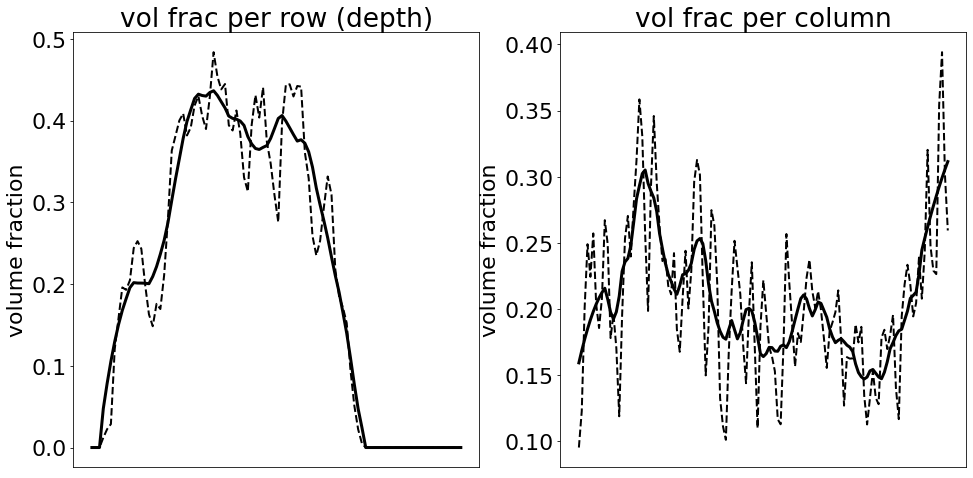

In [12]:
plt.figure(figsize=[16,8])
h_stripe = 20
v_stripe = 20

h_vol_av=[]
v_vol_av=[]

for i in np.arange(0,digital_image.shape[0]//h_stripe):
    id_range = range(i * h_stripe, (i+1) * h_stripe)
    h_vol_av.append( np.count_nonzero(digital_image[id_range,:]) / digital_image[id_range,:].size)

for i in np.arange(0,digital_image.shape[1]//v_stripe):
    id_range = range(i * v_stripe, (i+1) * v_stripe)
    v_vol_av.append( np.count_nonzero(digital_image[:,id_range]) / digital_image[:,id_range].size)


from scipy.signal import savgol_filter
plt.figure(figsize=[16,8])
window = 19
order = 2
smotthed_h_vol_av = savgol_filter(h_vol_av, window, order)
smotthed_v_vol_av = savgol_filter(v_vol_av, window, order)
smotthed_h_vol_av[smotthed_h_vol_av<=0] = 0
smotthed_h_vol_av[np.array(h_vol_av)<=0] = 0
smotthed_v_vol_av[smotthed_v_vol_av<0] = 0
smotthed_v_vol_av[np.array(v_vol_av)<=0] = 0

plt.rcParams.update({'font.size': 22})

plt.subplot(1,2,1)
plt.plot(range(len(h_vol_av)),h_vol_av,'k', linestyle='--',linewidth=2)
plt.plot(range(len(h_vol_av)),smotthed_h_vol_av,'k',linewidth=3)
plt.xticks([])
plt.title('vol frac per row (depth)')
plt.ylabel('volume fraction')
# plt.savefig('fig/vol_frac_distribution_h.png', bbox_inches='tight')

plt.subplot(1,2,2)
plt.plot(range(len(v_vol_av)),v_vol_av,'k', linestyle='--',linewidth=2)
plt.plot(range(len(v_vol_av)),smotthed_v_vol_av,'k',linewidth=3)
plt.xticks([])
plt.title('vol frac per column')
plt.ylabel('volume fraction')
# plt.savefig('fig/vol_frac_distribution_v.png', bbox_inches='tight')

Text(0, 0.5, 'reinforcement depth [$\\mu$m]')

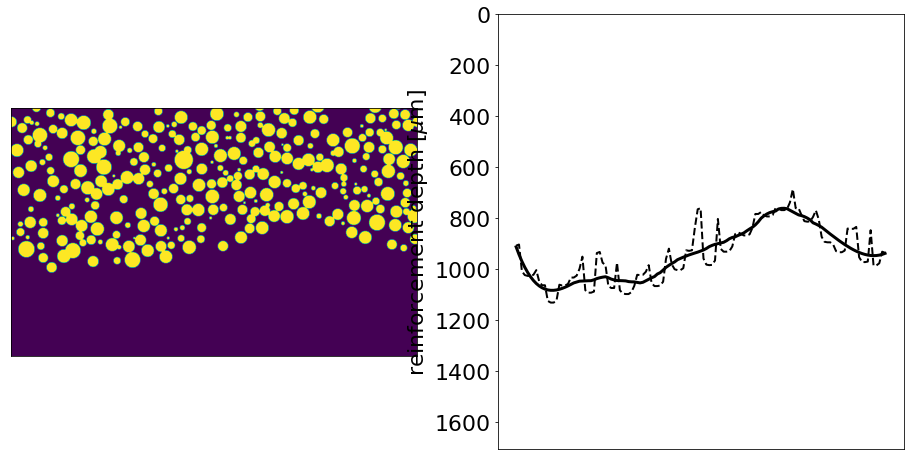

In [22]:
window = 41
order = 3
plt.figure(figsize=[16,8])
vol_frac_threshold = 0.3
idx = np.argmax(smotthed_h_vol_av>0.25) * h_stripe
digital_image_cleaned = digital_image[idx:,:]
plt.subplot(1,2,1)
plt.xticks([])
plt.yticks([])
plt.imshow(digital_image_cleaned)
# np.count_nonzero(digital_image_cleaned[:20,:]) / digital_image_cleaned[:20,:].size

#reinforcement depth
reinforcement_depth = []
for i in np.arange(0,digital_image_cleaned.shape[1]//v_stripe):
    id_range = range(i * v_stripe, (i+1) * v_stripe)
    reinforcement_depth.append(np.nonzero(np.sum(digital_image_cleaned[:,id_range],axis=1))[-1][-1] / 185 * 200)
plt.subplot(1,2,2)
plt.plot(reinforcement_depth,'k', linestyle='--',linewidth=2)
plt.plot(savgol_filter(reinforcement_depth, window, order),'k',linewidth=3)
plt.xticks([])
plt.ylim([0,digital_image_cleaned.shape[0] / 185 * 200])
plt.gca().invert_yaxis()
plt.ylabel('reinforcement depth [$\mu$m]')
# plt.savefig('fig/cleaned_micro_and_reinforcement_depth.png', bbox_inches='tight')



In [45]:
np.save("digital_image_cleaned",digital_image_cleaned)
# from scipy import signal
# plt.imshow(cutimage:=digital_image_cleaned[:800,:])
# n=int(150 /200*185)
# volfilter = np.ones((n,n))/n**2
# filteredimg = signal.convolve2d(volfilter, cutimage, boundary='wrap', mode='valid')
# plt.imshow(filteredimg)
# filteredimg.mean()

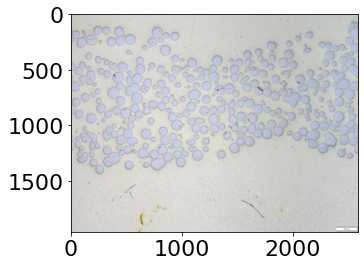

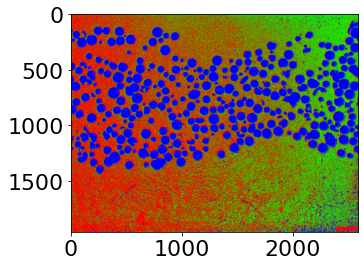

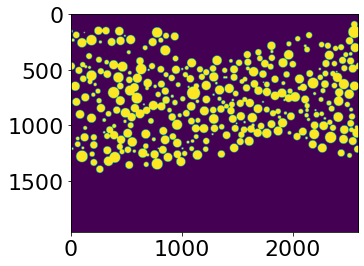

In [14]:
# plt.figure(figsize=[16,8])
# plt.imshow(digital_image)
# plt.xticks([])
# plt.yticks([])
# # plt.savefig('fig/artificial.png', bbox_inches='tight')
#
# plt.figure(figsize=[8,16])
# plt.plot(range(len(h_vol_av)),h_vol_av,'k', linestyle='--',linewidth=2)
# plt.plot(range(len(h_vol_av)),smotthed_h_vol_av,'k',linewidth=3)
# plt.xticks([])
# plt.title('vol frac per row (depth)')
# plt.ylabel('volume fraction')
# # plt.savefig('fig/vol_frac_distribution_h.png', bbox_inches='tight')
#
# plt.figure(figsize=[16,8])
# plt.plot(range(len(v_vol_av)),v_vol_av,'k', linestyle='--',linewidth=2)
# plt.plot(range(len(v_vol_av)),smotthed_v_vol_av,'k',linewidth=3)
# plt.xticks([])
# plt.title('vol frac per column')
# plt.ylabel('volume fraction')
# # plt.savefig('fig/vol_frac_distribution_v.png', bbox_inches='tight')

# plt.figure(figsize=[16,8])
# plt.imshow(digital_image_cleaned)
# plt.xticks([])
# plt.yticks([])
# # plt.savefig('fig/digital_image_cleaned.png', bbox_inches='tight')
#
# plt.figure(figsize=[16,8])
# plt.plot(reinforcement_depth,'k', linestyle='--',linewidth=2)
# plt.plot(savgol_filter(reinforcement_depth, window, order),'k',linewidth=3)
# plt.xticks([])
# plt.ylim([0,digital_image_cleaned.shape[0] / 185 * 200])
# plt.gca().invert_yaxis()
# plt.grid()
# plt.ylabel('reinforcement depth [$\mu$m]')
# # plt.savefig('fig/reinforcement_depth.png', bbox_inches='tight')


plt.figure()
plt.imshow(image)
# plt.savefig('fig/1.png', bbox_inches='tight')

m_image_pixels = np.zeros_like(image_pixels)
idx = np.argmax(image_pixels,axis=1)
m_image_pixels[idx==0]=[255,0,0]
m_image_pixels[idx==1]=[0,255,0]
m_image_pixels[idx==2]=[0,0,255]
m_image = m_image_pixels.reshape(image.shape)

plt.figure()
plt.imshow(m_image)
# plt.savefig('fig/2.png', bbox_inches='tight')
plt.figure()
plt.imshow(digital_image)
# plt.savefig('fig/3.png', bbox_inches='tight')

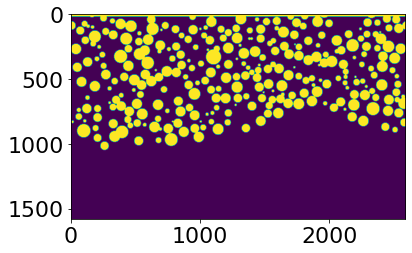

In [15]:
tst = np.copy(digital_image_cleaned)
tst[:20,:]=1
plt.imshow(tst)


<ipython-input-16-89f5d7f721ba>:14: FutureWarning: `draw.circle` is deprecated in favor of `draw.disk`.`draw.circle` will be removed in version 0.19
  rr, cc = circle(np.squeeze(cnt[i])[1],np.squeeze(cnt[i])[0],3)


<Figure size 1152x576 with 0 Axes>

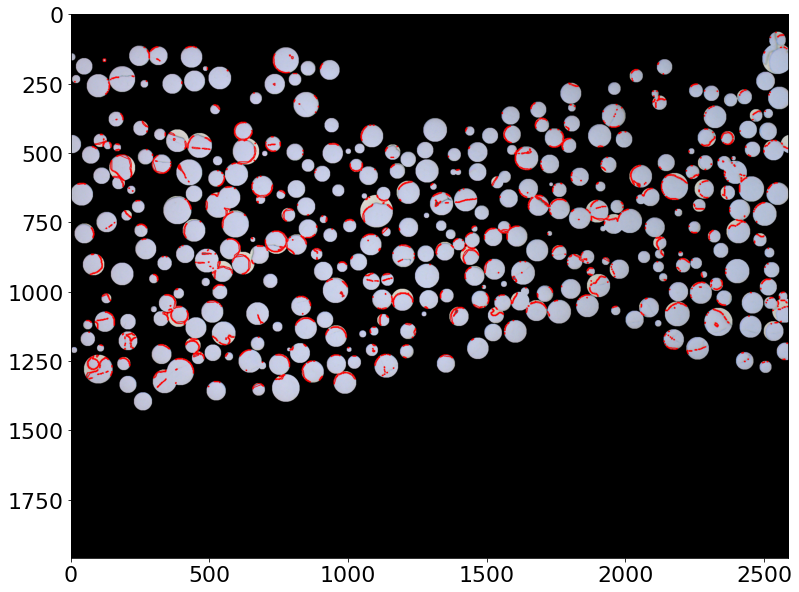

In [16]:
plt.figure(figsize=[16,8])
image_cracks = image * digital_image[...,None]
gray = cv.cvtColor(image_cracks,cv.COLOR_RGB2GRAY)
# gray[:50,:50]=255

thresh = cv.adaptiveThreshold(gray,255,cv.ADAPTIVE_THRESH_GAUSSIAN_C,cv.THRESH_BINARY,3,3)
# ret2,thresh = cv.threshold(gray,0,255,cv.THRESH_OTSU)
contours, hierarchy = cv.findContours(thresh, cv.RETR_TREE, cv.CHAIN_APPROX_SIMPLE)

for cnt in contours:
    try:
        del_idx = []
        for i in range(cnt.shape[0]):
            rr, cc = circle(np.squeeze(cnt[i])[1],np.squeeze(cnt[i])[0],3)
            rr[rr>=digital_image.shape[0]] = digital_image.shape[0]-1
            cc[cc>=digital_image.shape[1]] = digital_image.shape[1]-1
            if np.any(digital_image[rr,cc]) == 0:
                del_idx.append(i)
        np.delete(cnt,del_idx,0)
    except:
        pass
    area = cv.contourArea(cnt)
    hull = cv.convexHull(cnt)
    if 5 < area < 100:
        cv.drawContours(image_cracks, [hull], -1, (255, 0, 0), 2)


# plt.subplot(1,2,1)
# plt.imshow(gray)
# plt.subplot(1,2,2)
# plt.imshow(thresh)
#
# plt.figure(figsize=[16,10])
# plt.imshow(image * digital_image[...,None])

plt.figure(figsize=[16,10])
plt.imshow(image_cracks)
# plt.savefig('fig/first_crack_isolation_attempt.png', bbox_inches='tight')

In [17]:
# TODO [double check x and y axis ]
# TODO [don't use scipy circle due to the different axis used there]


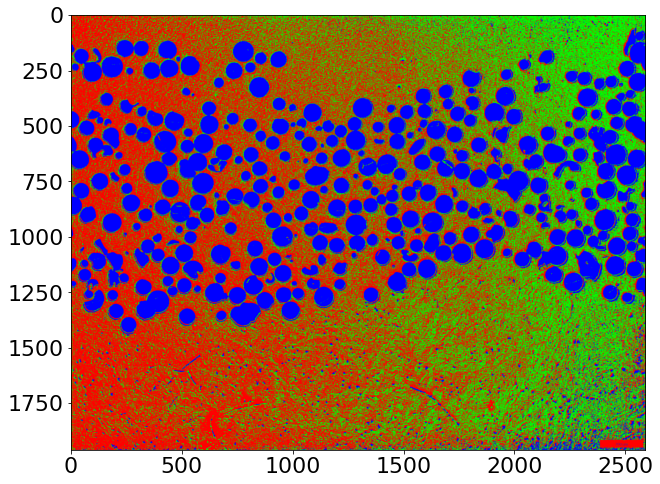

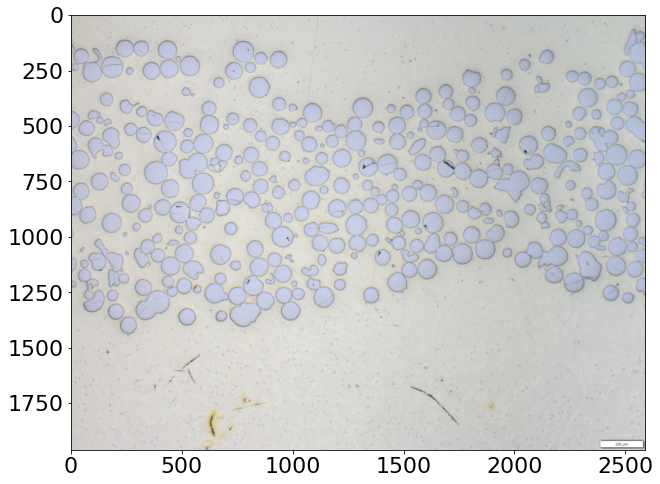

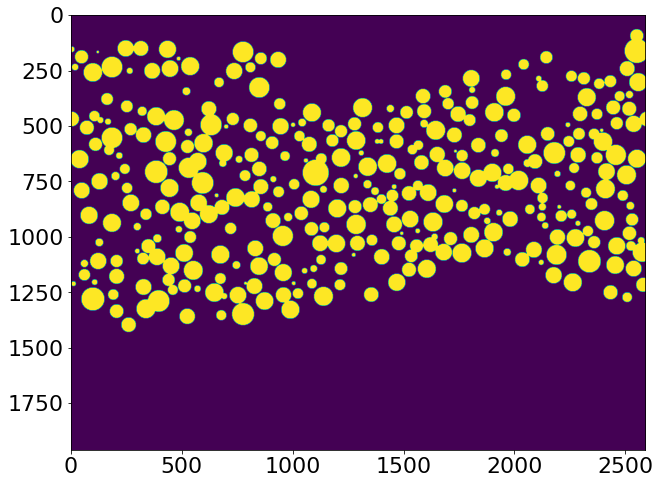

In [18]:
plt.figure(figsize=[16,8])

m_image_pixels = np.zeros_like(image_pixels)
idx = np.argmax(image_pixels,axis=1)
m_image_pixels[idx==0]=[255,0,0]
m_image_pixels[idx==1]=[0,255,0]
m_image_pixels[idx==2]=[0,0,255]
m_image = m_image_pixels.reshape(image.shape)
plt.imshow(m_image)
# plt.savefig('fig/segmented.png', bbox_inches='tight',dpi=400)


plt.figure(figsize=[16,8])
plt.imshow(image)
# plt.savefig('fig/original.png', bbox_inches='tight',dpi=400)


plt.figure(figsize=[16,8])
plt.imshow(digital_image)
# plt.savefig('fig/digital.png', bbox_inches='tight',dpi=400)


64.14414414414415 64.86486486486487 127.56756756756758 12.972972972972974 23.274869041892654


(array([23., 26., 25., 68., 49., 57., 70., 15.,  7.,  2.]),
 array([ 12.97297297,  24.43243243,  35.89189189,  47.35135135,
         58.81081081,  70.27027027,  81.72972973,  93.18918919,
        104.64864865, 116.10810811, 127.56756757]),
 <BarContainer object of 10 artists>)

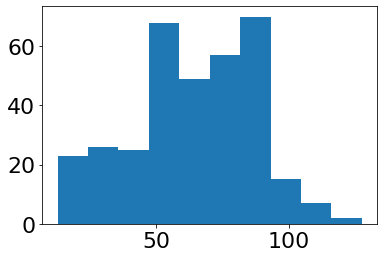